ADF Test p-value: 0.7144310772162712
ADF Test after differencing p-value: 8.721045688119497e-09


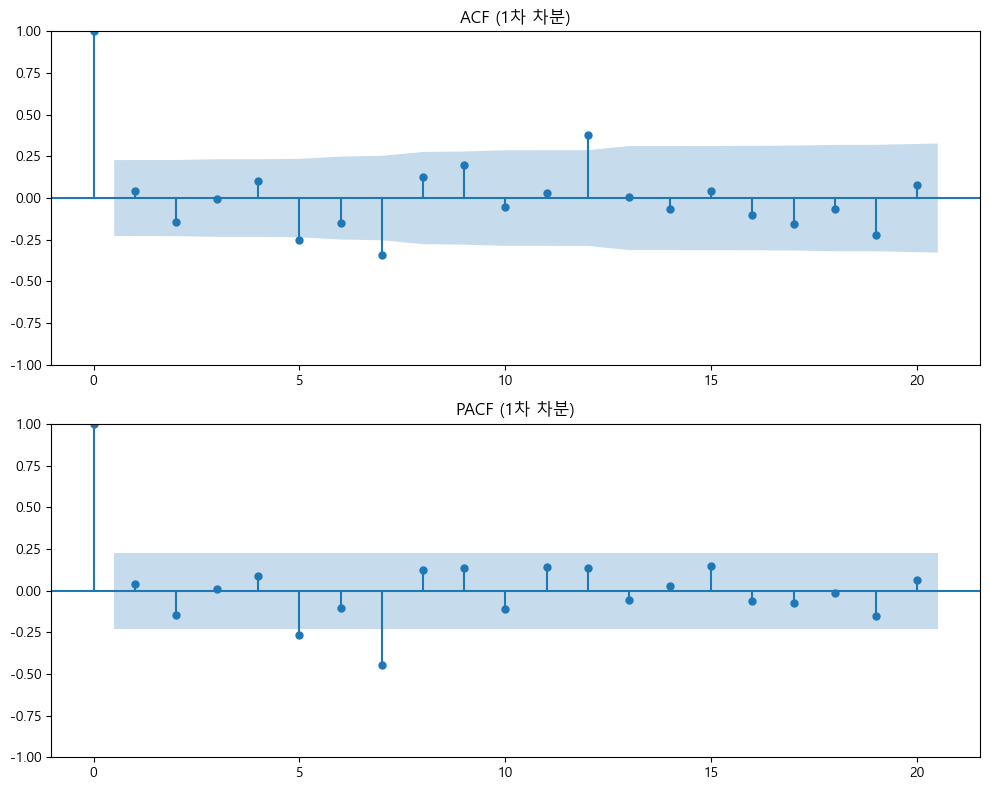

                               SARIMAX Results                                
Dep. Variable:                    실업률   No. Observations:                   75
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -56.930
Date:                Tue, 29 Apr 2025   AIC                            119.860
Time:                        10:49:04   BIC                            126.773
Sample:                    01-01-2019   HQIC                           122.618
                         - 03-01-2025                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3129      1.340     -0.234      0.815      -2.938       2.313
ma.L1          0.3878      1.276      0.304      0.761      -2.114       2.889
sigma2         0.2727      0.034      8.124      0.0

C:\Users\yeppo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\yeppo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\yeppo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


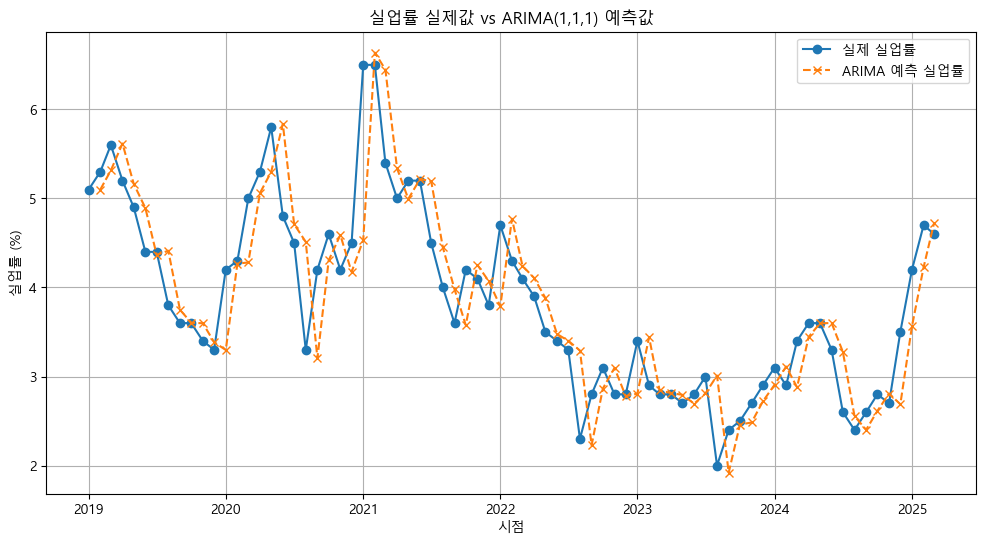

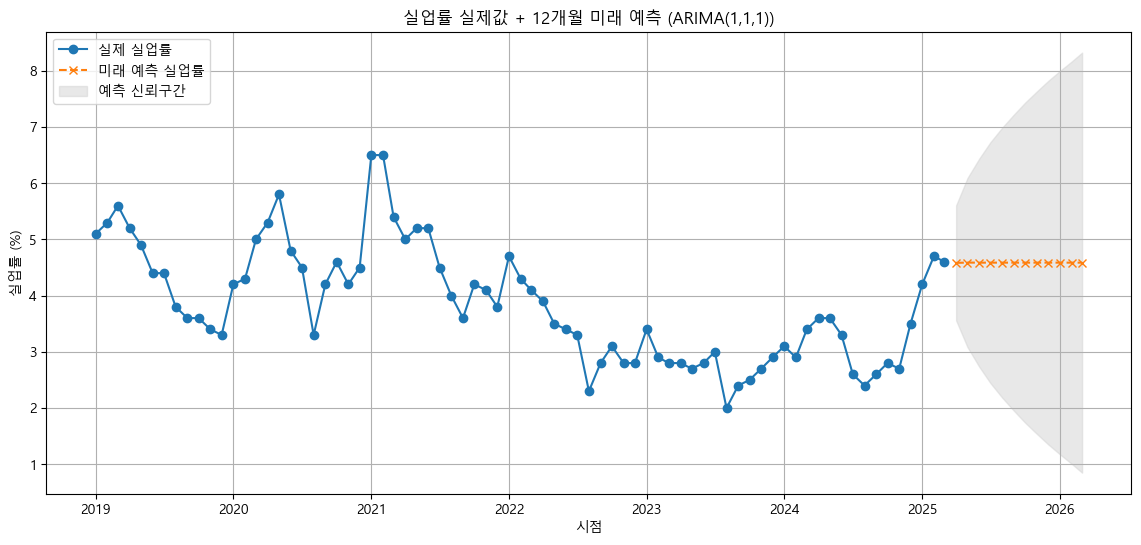

In [22]:
# 실업률 분석

# 필요한 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
import matplotlib

# 1. 데이터 불러오기
file_path = "C:/Users/yeppo/OneDrive/Desktop/시계열데이터분석/고용지표.csv"
df = pd.read_csv(file_path)


# 한글 폰트 설정
matplotlib.rc('font', family='Malgun Gothic')

# 마이너스 부호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

# 2. 잘못된 헤더(첫 행) 제거
# 첫 번째 행이 진짜 데이터가 아니므로 삭제하고 인덱스 리셋
df = df.drop(index=0).reset_index(drop=True)

# 3. '시점' 열을 날짜(datetime) 타입으로 변환
df['시점'] = df['시점'].str.replace(' ', '').str.replace('.', '-') + '-01'
df['시점'] = pd.to_datetime(df['시점'], format='%Y-%m-%d')

# 4. '실업률' 컬럼을 숫자(float)형으로 변환
df['실업률'] = pd.to_numeric(df['실업률'], errors='coerce')

# 5. '시점'을 인덱스로 설정하고, 실업률 데이터만 추출
df = df.set_index('시점')
unemployment = df['실업률']

# 6. 정상성 확인 - ADF Test 수행
adf_result = adfuller(unemployment)
print('ADF Test p-value:', adf_result[1])

# 정상성이 없으면 1차 차분 진행
unemployment_diff = unemployment.diff().dropna()

# 7. 1차 차분한 데이터로 다시 정상성 검사
adf_result_diff = adfuller(unemployment_diff)
print('ADF Test after differencing p-value:', adf_result_diff[1])

# 8. ACF, PACF 플롯으로 (p, q) 결정 참고
fig, axes = plt.subplots(2, 1, figsize=(10,8))
plot_acf(unemployment_diff, ax=axes[0], lags=20)
axes[0].set_title('ACF (1차 차분)')
plot_pacf(unemployment_diff, ax=axes[1], lags=20, method='ywm')
axes[1].set_title('PACF (1차 차분)')
plt.tight_layout()
plt.show()

# 9. ARIMA(1,1,1) 모델 학습
model = ARIMA(unemployment, order=(1, 1, 1))
model_fit = model.fit()

# 모델 요약 출력
print(model_fit.summary())

# 10. 예측값 생성 (fittedvalues 대신 predict 사용)
predicted = model_fit.predict(start=unemployment.index[1], end=unemployment.index[-1], typ='levels')

# 11. 실제 실업률과 예측 실업률 비교 시각화
plt.figure(figsize=(12,6))
plt.plot(unemployment.index, unemployment, label='실제 실업률', marker='o')
plt.plot(predicted.index, predicted, label='ARIMA 예측 실업률', linestyle='--', marker='x')
plt.title('실업률 실제값 vs ARIMA(1,1,1) 예측값')
plt.xlabel('시점')
plt.ylabel('실업률 (%)')
plt.legend()
plt.grid(True)
plt.show()

# 12. 미래 실업률 예측 (12개월)
forecast_steps = 12
forecast_result = model_fit.get_forecast(steps=forecast_steps)
forecast_mean = forecast_result.predicted_mean
forecast_conf_int = forecast_result.conf_int()

# 13. 기존 데이터 + 미래 예측 시각화
plt.figure(figsize=(14,6))
plt.plot(unemployment.index, unemployment, label='실제 실업률', marker='o')
plt.plot(forecast_mean.index, forecast_mean, label='미래 예측 실업률', marker='x', linestyle='--')
plt.fill_between(forecast_conf_int.index,
                 forecast_conf_int.iloc[:,0],
                 forecast_conf_int.iloc[:,1],
                 color='lightgrey', alpha=0.5, label='예측 신뢰구간')
plt.title('실업률 실제값 + 12개월 미래 예측 (ARIMA(1,1,1))')
plt.xlabel('시점')
plt.ylabel('실업률 (%)')
plt.legend()
plt.grid(True)
plt.show()


ADF Test p-value: 0.17790230586830463
ADF Test after differencing p-value: 2.928890200264408e-10


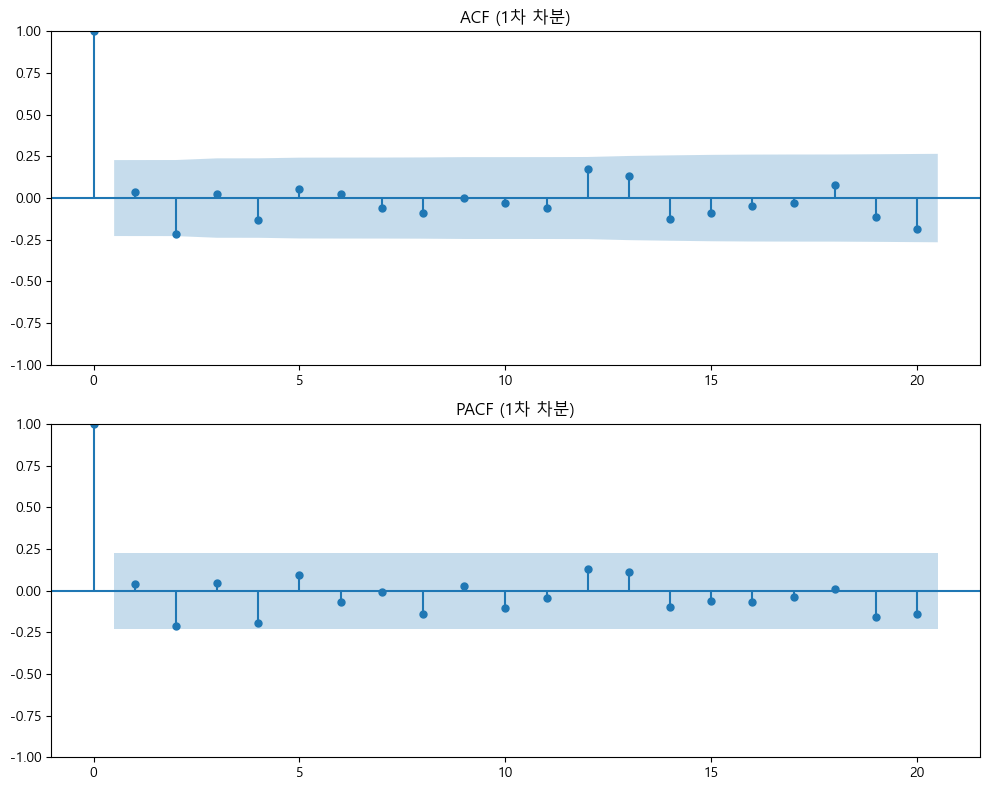

                               SARIMAX Results                                
Dep. Variable:                    고용률   No. Observations:                   75
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -49.446
Date:                Tue, 29 Apr 2025   AIC                            104.892
Time:                        10:46:37   BIC                            111.805
Sample:                    01-01-2019   HQIC                           107.650
                         - 03-01-2025                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6537      0.175     -3.726      0.000      -0.998      -0.310
ma.L1          0.8701      0.139      6.270      0.000       0.598       1.142
sigma2         0.2219      0.036      6.189      0.0

C:\Users\yeppo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\yeppo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\yeppo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


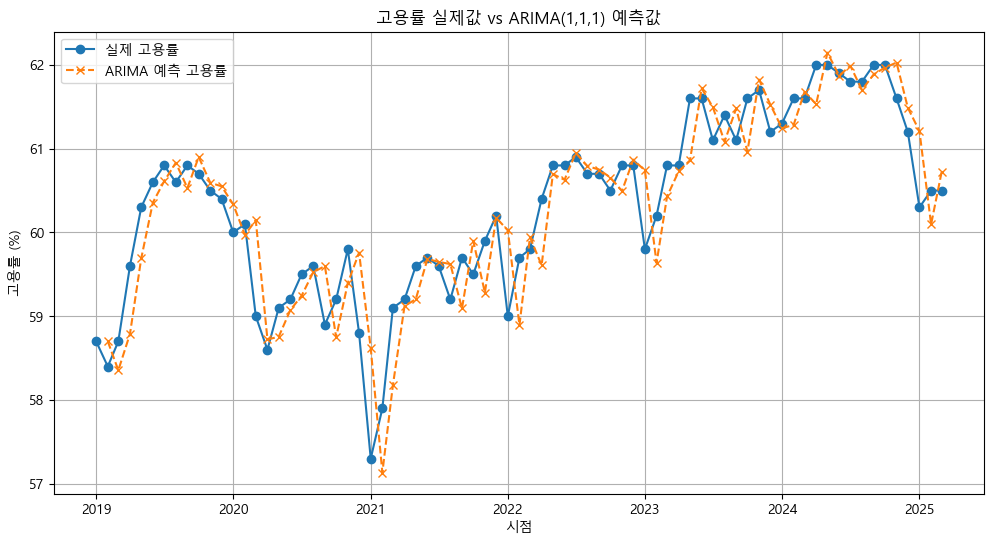

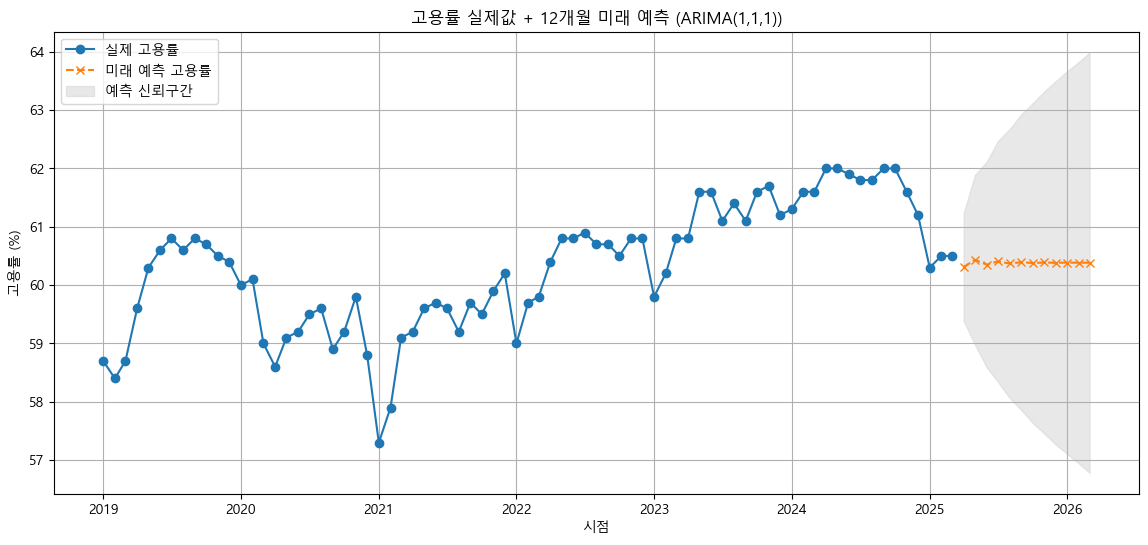

In [20]:
# 고용률 분석

# 필요한 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
import matplotlib

# 1. 데이터 불러오기
file_path = "C:/Users/yeppo/OneDrive/Desktop/시계열데이터분석/고용지표.csv"
df = pd.read_csv(file_path)

# 한글 폰트 설정
matplotlib.rc('font', family='Malgun Gothic')

# 마이너스 부호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

# 2. 잘못된 헤더(첫 행) 제거
df = df.drop(index=0).reset_index(drop=True)

# 3. '시점' 열을 날짜(datetime) 타입으로 변환
df['시점'] = df['시점'].str.replace(' ', '').str.replace('.', '-') + '-01'
df['시점'] = pd.to_datetime(df['시점'], format='%Y-%m-%d')

# 4. '고용률' 컬럼을 숫자(float)형으로 변환
df['고용률'] = pd.to_numeric(df['고용률'], errors='coerce')

# 5. '시점'을 인덱스로 설정하고, 고용률 데이터만 추출
df = df.set_index('시점')
employment = df['고용률']

# 6. 정상성 확인 - ADF Test 수행
adf_result = adfuller(employment)
print('ADF Test p-value:', adf_result[1])

# 정상성이 없으면 1차 차분 진행
employment_diff = employment.diff().dropna()

# 7. 1차 차분한 데이터로 다시 정상성 검사
adf_result_diff = adfuller(employment_diff)
print('ADF Test after differencing p-value:', adf_result_diff[1])

# 8. ACF, PACF 플롯으로 (p, q) 결정 참고
fig, axes = plt.subplots(2, 1, figsize=(10,8))
plot_acf(employment_diff, ax=axes[0], lags=20)
axes[0].set_title('ACF (1차 차분)')
plot_pacf(employment_diff, ax=axes[1], lags=20, method='ywm')
axes[1].set_title('PACF (1차 차분)')
plt.tight_layout()
plt.show()

# 9. ARIMA(1,1,1) 모델 학습
model = ARIMA(employment, order=(1, 1, 1))
model_fit = model.fit()

# 모델 요약 출력
print(model_fit.summary())

# 10. 예측값 생성 (fittedvalues 대신 predict 사용)
predicted = model_fit.predict(start=employment.index[1], end=employment.index[-1], typ='levels')

# 11. 실제 고용률과 예측 고용률 비교 시각화
plt.figure(figsize=(12,6))
plt.plot(employment.index, employment, label='실제 고용률', marker='o')
plt.plot(predicted.index, predicted, label='ARIMA 예측 고용률', linestyle='--', marker='x')
plt.title('고용률 실제값 vs ARIMA(1,1,1) 예측값')
plt.xlabel('시점')
plt.ylabel('고용률 (%)')
plt.legend()
plt.grid(True)
plt.show()

# 12. 미래 고용률 예측 (12개월)
forecast_steps = 12
forecast_result = model_fit.get_forecast(steps=forecast_steps)
forecast_mean = forecast_result.predicted_mean
forecast_conf_int = forecast_result.conf_int()

# 13. 기존 데이터 + 미래 예측 시각화
plt.figure(figsize=(14,6))
plt.plot(employment.index, employment, label='실제 고용률', marker='o')
plt.plot(forecast_mean.index, forecast_mean, label='미래 예측 고용률', marker='x', linestyle='--')
plt.fill_between(forecast_conf_int.index,
                 forecast_conf_int.iloc[:,0],
                 forecast_conf_int.iloc[:,1],
                 color='lightgrey', alpha=0.5, label='예측 신뢰구간')
plt.title('고용률 실제값 + 12개월 미래 예측 (ARIMA(1,1,1))')
plt.xlabel('시점')
plt.ylabel('고용률 (%)')
plt.legend()
plt.grid(True)
plt.show()